In [49]:
'''
- around 72.6% of videos are correctly predicted.
- Deviation from actual start-time of answers from predicted start-time:
    (Effective-Error)
    - Roberta model:
        - Average of 90.8s or 9.28% of video, 
        - Average of 19s 1.83% of video, ignoring 20% of outliers
    - DistilBert model:
        - Average of 210.8s or 19.17% of video, 
        - Average of 107.7s or 10.38% of video, ignoring 20% of outliers
'''
''''''

''

In [50]:
import pandas as pd
from utils import *

In [51]:
qdset = pd.read_csv('../cc-dset-questions-v1.csv')
dsetDetails = pd.read_csv('../cc-dset-vid-details.csv')
quesdset = qdset.join(dsetDetails.set_index('Video_ID'), on='Video_ID')

In [52]:
kdset = pd.read_csv('../base-results/cc-dset-results-videoIds-kwdidx.csv')
sdset = pd.read_csv('../base-results/cc-dset-results-videoIds-semidx.csv')
bdset = pd.read_csv('../base-results/cc-dset-results-videoIds-bothidx.csv')
rob_ansdset = pd.read_csv('../base-results/cc-dset-results-ans-rob.csv')
dis_ansdset = pd.read_csv('../base-results/cc-dset-results-ans-dis.csv')

Video Id retrieval results:

In [53]:
correctVideoIds = list(quesdset['Video_ID'])
#Below will be compared

Overall result:


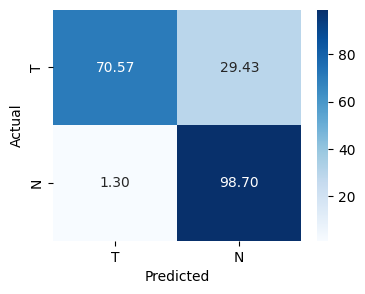

Confused pairs:  [[(301, 401), 19.05], [(105, 205), 16.67], [(201, 302), 14.29], [(303, 402), 13.16], [(104, 201), 12.5]]
Related Videos result:  [73.91, 26.09]


In [54]:
#Keyword Index
predictedVideoIds = list(kdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(kdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


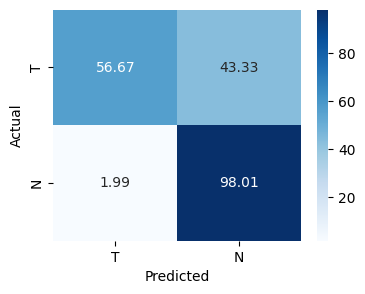

Confused pairs:  [[(301, 401), 22.22], [(205, 404), 19.05], [(303, 402), 18.42], [(104, 201), 15.0], [(204, 404), 14.55]]
Related Videos result:  [45.15, 54.85]


In [55]:
#Semantic Index
predictedVideoIds = list(sdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(sdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Overall result:


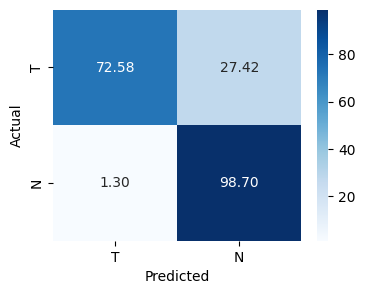

Confused pairs:  [[(301, 401), 22.22], [(303, 402), 15.79], [(305, 404), 10.87], [(201, 302), 10.71], [(305, 405), 10.53]]
Related Videos result:  [72.67, 27.33]


In [56]:
#Combined Index
predictedVideoIds = list(bdset['Predicted_Video_ID'].astype('Int64'))
res = compareVidIds(correctVideoIds, predictedVideoIds)
print("Overall result:")
drawConfusionMatrix(res['totalResults'])
print("Confused pairs: ", res['confusedResults'])

relatedVideoIds = list(bdset['Related_Video_IDs'])
relRes = compareRelatedVids(correctVideoIds, predictedVideoIds, relatedVideoIds)
print("Related Videos result: ", relRes)

Answer prediction results (Roberta):

In [57]:
dset = rob_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Start_timestamp,Duration
0,101,Authentication is an important topic in cloud ...,27,35,Authentication is an important topic in cloud ...,27,35,204 202 404,101,What is authentication?,28,1081
1,101,an open stack service that provides API client...,55,69,Keystone is an open stack service that provide...,52,69,503 405 301,101,What is Keystone?,54,1081
2,101,an abstraction used by other open stack servic...,80,93,a project is an abstraction used by other open...,80,93,405 105 304,101,What is a project in Keystone?,80,1081
3,101,to be the registry of projects and to articula...,93,102,to be the registry of projects and to articula...,93,102,503 405 204,101,What is the fundamental purpose of the keystone?,92,1081
4,101,some kind of access to resources in the project.,118,126,that the user or user group has some kind of a...,115,126,104 303 304,101,What does assigning role to a user or user gro...,113,1081


100% Mean: 9.76
80% Mean: 1.26


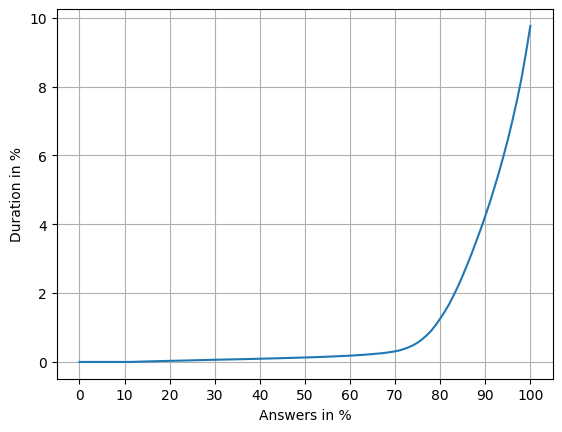

100% Mean: 95.2
80% Mean: 12.84


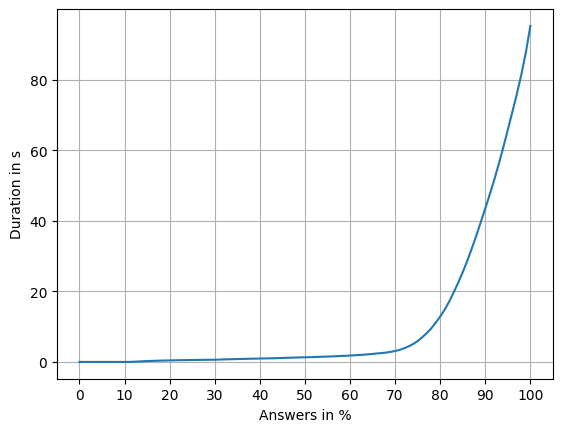

In [58]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 8.79
80% Mean: 1.02


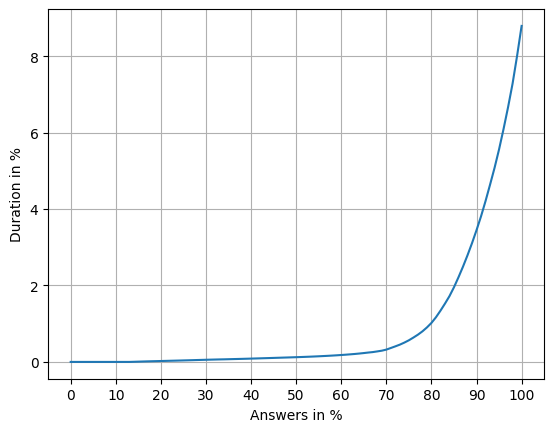

100% Mean: 86.37
80% Mean: 10.84


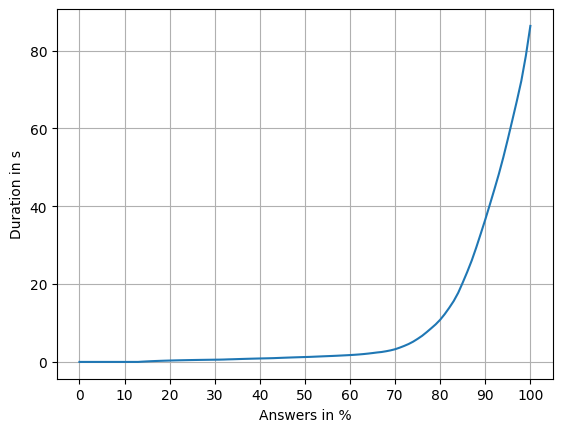

In [59]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 9.28
80% Mean: 1.83


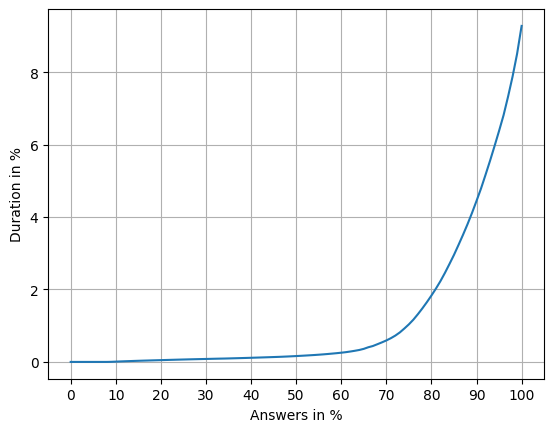

100% Mean: 90.78
80% Mean: 18.97


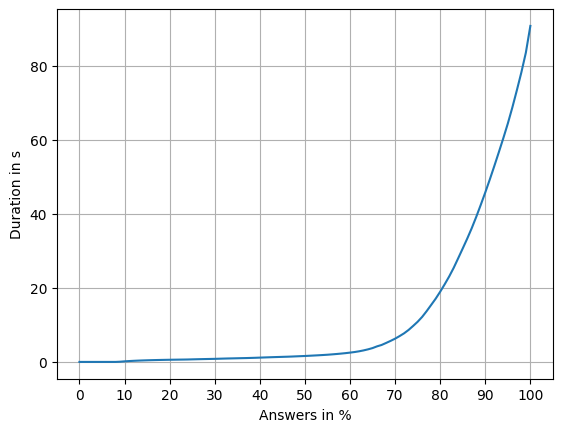

In [60]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')

Answer prediction results (Distilbert):

In [61]:
dset = dis_ansdset.join(quesdset)
rightdset = dset[dset['Video_ID'] == dset['Predicted_Video_ID']]
rightdset.head()
#rightdset has only the rows with correct predicted IDs.

,Predicted_Video_ID,BestAnswer,BestAnswer_start,BestAnswer_end,LongAnswer,LongAnswer_start,LongAnswer_end,Related_Video_IDs,Video_ID,Question,Start_timestamp,Duration
0,101,domain scoped,701,702,confirm the identity of a user whenever a user...,43,50,204 202 404,101,What is authentication?,28,1081
1,101,an open stack service,55,58,directory access protocol,547,549,503 405 301,101,What is Keystone?,54,1081
2,101,OpenStack service,336,339,an abstraction used by other open stack servic...,80,93,405 105 304,101,What is a project in Keystone?,80,1081
3,101,to determine which user is authenticating,887,892,to be the registry of projects and to articula...,93,102,503 405 204,101,What is the fundamental purpose of the keystone?,92,1081
4,101,the user or user group has some kind of access...,115,126,that the user or user group has some kind of a...,115,126,104 303 304,101,What does assigning role to a user or user gro...,113,1081


100% Mean: 18.97
80% Mean: 7.3


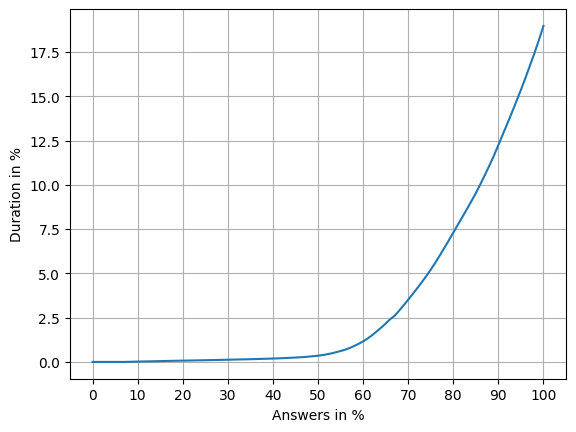

100% Mean: 213.35
80% Mean: 75.92


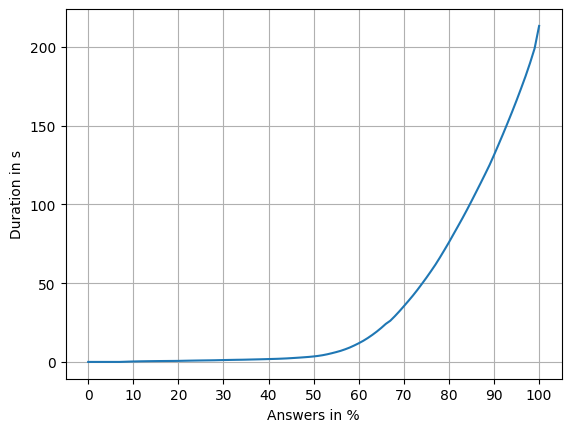

In [62]:
#Best-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 19.38
80% Mean: 8.6


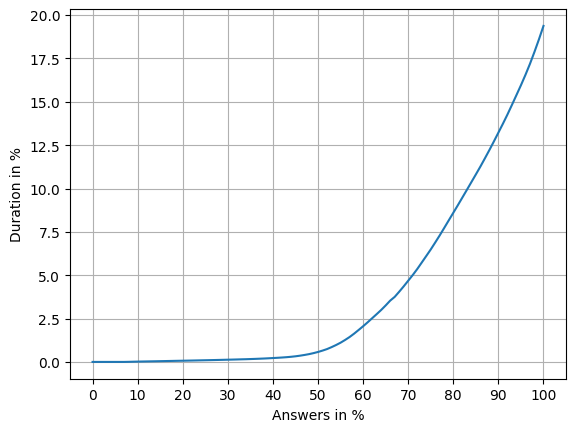

100% Mean: 208.25
80% Mean: 85.03


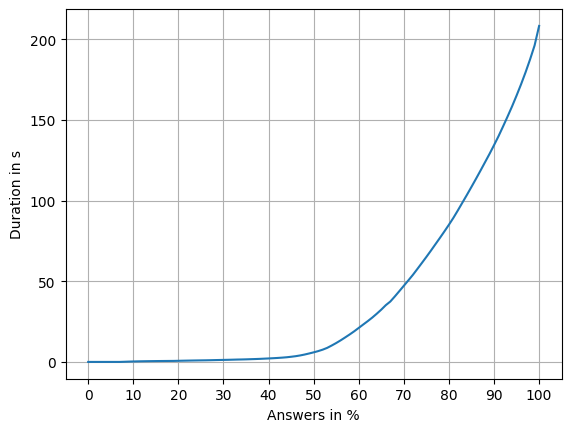

In [63]:
#Long-Answers
errs = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
showAvgPlots(errs, ylabel='Duration in %')
errs = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
showAvgPlots(errs, ylabel='Duration in s')

100% Mean: 19.17
80% Mean: 10.38


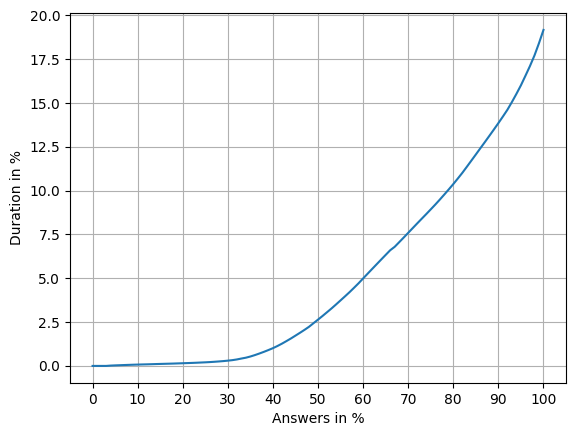

100% Mean: 210.8
80% Mean: 107.71


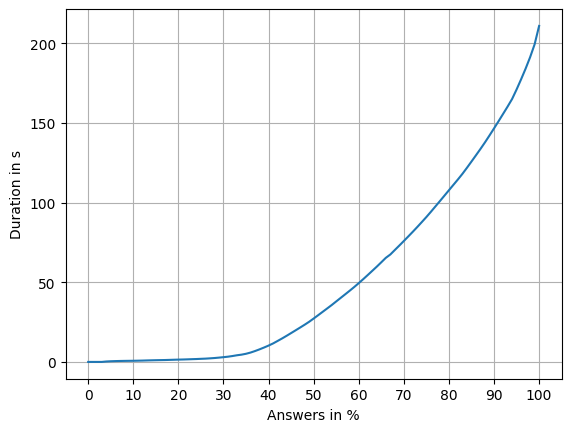

In [64]:
#Effective-Error
prob1 = 0.5 #to choose best
prob2 = 0.5 #to choose worst
errs1 = list((abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start'])*100)/rightdset['Duration'])
errs2 = list((abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start'])*100)/rightdset['Duration'])
errs  = [min(errs1[i], errs2[i])*prob1 + max(errs1[i], errs2[i])*prob2 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in %')
errs1 = list(abs(rightdset['Start_timestamp']-rightdset['BestAnswer_start']))
errs2 = list(abs(rightdset['Start_timestamp']-rightdset['LongAnswer_start']))
errs  = [errs1[i]*0.5 + errs2[i]*0.5 for i in range(len(errs1))]
showAvgPlots(errs, ylabel='Duration in s')